In [3]:
import os
os.environ["KERAS_BACKEND"] = "torch" # alternatively you can use jax or tensorflow as the backend (see installation instructions in keras documentation)
import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # helpful for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler # helpful for scaling data to be between 0 and 1 or have a mean of 0 and standard deviation of 1

np.random.seed(0) # set random seed for reproducibility

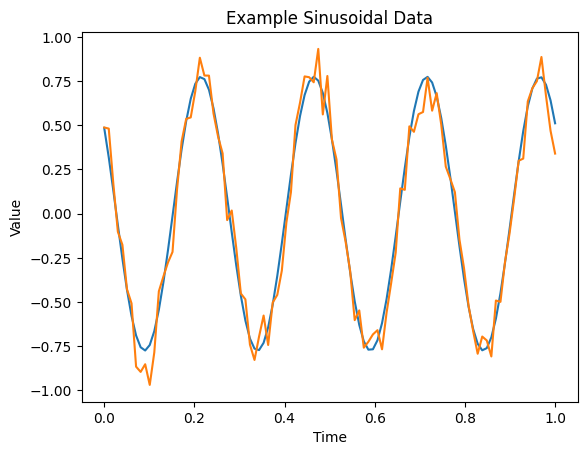

In [4]:
# create dataset of sinusoidal data with noise

# number of samples
n_samples = 10_000

# number of features
n_features = 100

# noise level
noise = 0.1

# time points
t = np.linspace(0, 1, n_features)

# create parameters for sinusoidal data (amplitude, frequency, phase)
amplitude = np.random.uniform(0.5, 1, n_samples)
frequency = np.random.uniform(1, 5, n_samples)
phase = np.random.uniform(0, 2*np.pi, n_samples)

# stack parameters into a single array
X = np.stack([amplitude, frequency, phase], axis=1)

# create sinusoidal data
models = amplitude[:, np.newaxis] * np.sin(2 * np.pi * frequency[:, np.newaxis] * t + phase[:, np.newaxis])

# add noise
y = models + noise * np.random.normal(size=models.shape)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# scale data
xscaler = MinMaxScaler()
yscaler = StandardScaler()

X_train = xscaler.fit_transform(X_train)
X_test = xscaler.transform(X_test)

y_train = yscaler.fit_transform(y_train)
y_test = yscaler.transform(y_test)

# plot example data
plt.plot(t, models[0])
plt.plot(t, y[0])
plt.title("Example Sinusoidal Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

## Neural network to predict y from X

In [5]:
# create neural network model with keras to predict the sinusoidal data from the parameters

# create model with keras functional API (alternative to the sequential API) with 2 hidden layers
inp = keras.layers.Input(shape=(3,)) # input layer with 3 neurons
x = keras.layers.Dense(100, activation="relu")(inp) # 100 neurons with relu activation function
x = keras.layers.Dense(100, activation="relu")(x) # 100 neurons with relu activation function
out = keras.layers.Dense(n_features)(x) # output layer with n_features neurons

model = keras.models.Model(inp, out) # create model with input and output layers

# compile model
model.compile(optimizer="adam", loss="mean_squared_error") # use adam optimizer and mean squared error loss function

# print model summary
model.summary()

# train model with training data and validate with testing data (early stopping is used to avoid overfitting)
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), 
          callbacks=[keras.callbacks.EarlyStopping(patience=5)]) # this stops training if the validation loss does not decrease for 5 epochs to avoid overfitting

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,600 (80.47 KB)

 Trainable params: 20,600 (80.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9742 - val_loss: 0.8734
Epoch 2/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8461 - val_loss: 0.7535
Epoch 3/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7335 - val_loss: 0.6765
Epoch 4/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6584 - val_loss: 0.6207
Epoch 5/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6083 - val_loss: 0.5674
Epoch 6/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5586 - val_loss: 0.5252
Epoch 7/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5135 - val_loss: 0.4830
Epoch 8/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4739 - val_loss: 0.4524
Epoch 9/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4434 - val_loss: 0.4140
Epoch 10/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4045 - val_loss: 0.3822
Epoch 11/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3794 - val_loss: 0.3600
Epoch 12/500
250/250 ━━━━━━━━━━━━━━━━━━━━

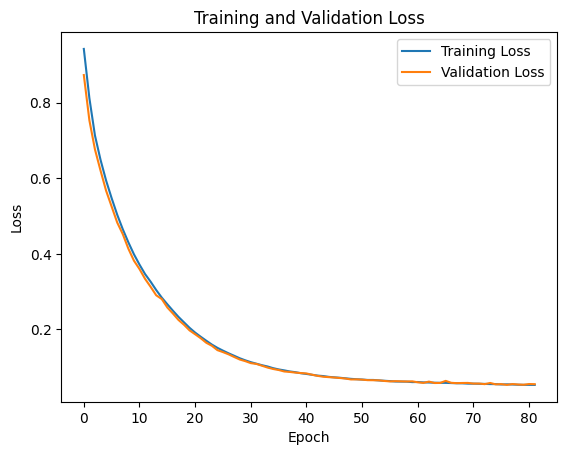

In [6]:
# plot training and validation loss

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [7]:
# evaluate model with testing data
loss = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.0545
Test Loss: 0.05520399659872055


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


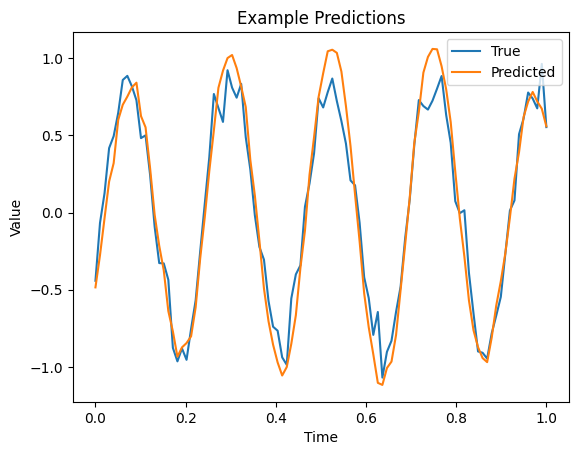

In [9]:
# plot example predictions
y_pred = model.predict(X_test)
y_pred_unscaled = yscaler.inverse_transform(y_pred)

y_test_unscaled = yscaler.inverse_transform(y_test)

plt.plot(t, y_test_unscaled[0], label="True")
plt.plot(t, y_pred_unscaled[0], label="Predicted")
plt.title("Example Predictions")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

plt.show()

# notice that the model is able to predict the sinusoidal data from the parameters with high accuracy
# this is an example of a regression problem
# the model is able to learn the relationship between the parameters and the sinusoidal data
# and can predict the sinusoidal data from the parameters with high accuracy
# However, it cannot predict the noise in the data as it is not deterministic

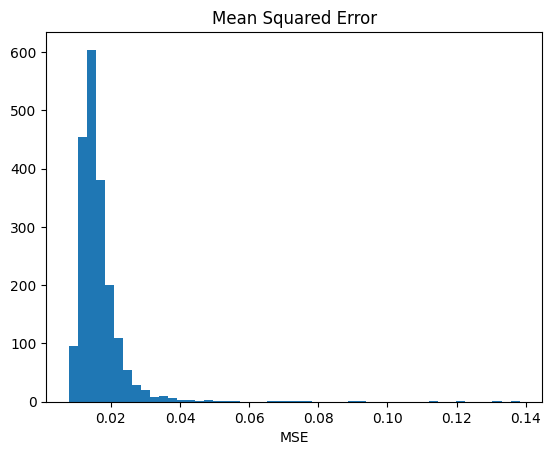

In [10]:
# Compute the mean squared error for each sample

# unscale the predictions and true values
y_pred_unscaled = yscaler.inverse_transform(y_pred)
y_test_unscaled = yscaler.inverse_transform(y_test)

# compute the mean squared error for each sample
mse = np.mean((y_pred_unscaled - y_test_unscaled)**2, axis=1)

# plot the mean squared error for each sample
plt.hist(mse, bins=50)
plt.title("Mean Squared Error")
plt.xlabel("MSE")

plt.show()

## Autoencoder (Neural network to predict y from y)

In [11]:
# create an autoencoder

inp = keras.layers.Input(shape=(n_features,)) # input layer with n_features neurons
x = keras.layers.Dense(64, activation="relu")(inp) # 64 neurons with relu activation function
x = keras.layers.Dense(32, activation="relu")(x) # 32 neurons with relu activation function
x = keras.layers.Dense(8, activation="relu")(x) # 8 neurons with relu activation function (bottleneck layer)
x = keras.layers.Dense(32, activation="relu")(x) # 32 neurons with relu activation function
x = keras.layers.Dense(64, activation="relu")(x) # 64 neurons with relu activation function
out = keras.layers.Dense(n_features)(x) # output layer with n_features neurons

autoencoder = keras.models.Model(inp, out) # create model with input and output layers

# compile model
autoencoder.compile(optimizer="adam", loss="mean_squared_error") # use adam optimizer and mean squared error loss function

# print model summary
autoencoder.summary()

# train model with training data and validate with testing data (early stopping is used to avoid overfitting)
history = autoencoder.fit(y_train, y_train, epochs=500, batch_size=32, validation_data=(y_test, y_test),
                callbacks=[keras.callbacks.EarlyStopping(patience=5)]) # this stops training if the validation loss does not decrease for 5 epochs to avoid overfitting
# notice that the input and output data are the same

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,708 (69.17 KB)

 Trainable params: 17,708 (69.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7606 - val_loss: 0.2297
Epoch 2/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1852 - val_loss: 0.1213
Epoch 3/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1088 - val_loss: 0.0833
Epoch 4/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0778 - val_loss: 0.0653
Epoch 5/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0618 - val_loss: 0.0575
Epoch 6/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0552 - val_loss: 0.0529
Epoch 7/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0513 - val_loss: 0.0492
Epoch 8/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0482 - val_loss: 0.0480
Epoch 9/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0464 - val_loss: 0.0469
Epoch 10/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0448 - val_loss: 0.0448
Epoch 11/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0436 - val_loss: 0.0435
Epoch 12/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

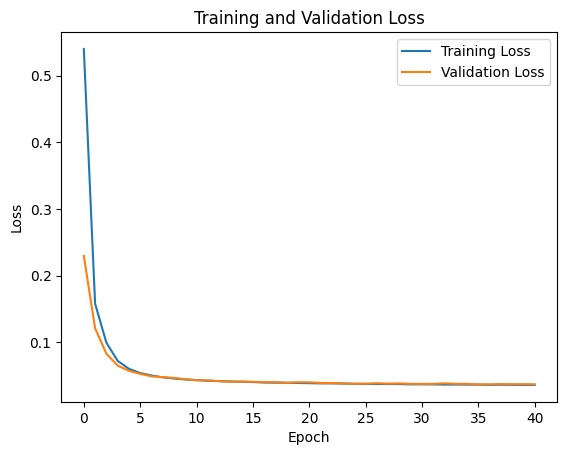

In [12]:
# plot training and validation loss

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [13]:
# evaluate model with testing data
loss = autoencoder.evaluate(y_test, y_test)

print(f"Test Loss: {loss}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.0371
Test Loss: 0.037187375128269196


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


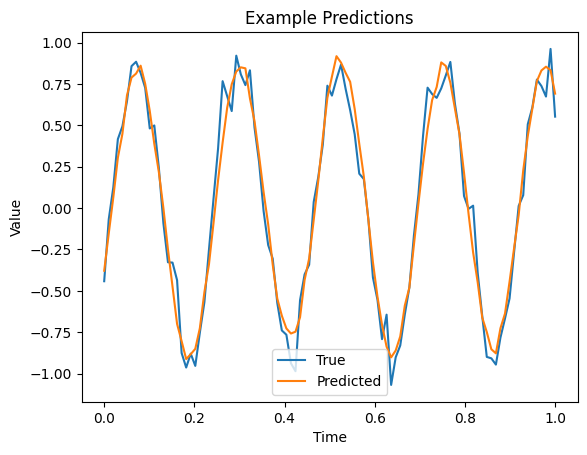

In [14]:
# plot example predictions
y_pred = autoencoder.predict(y_test)
y_pred_unscaled = yscaler.inverse_transform(y_pred)

y_test_unscaled = yscaler.inverse_transform(y_test)

plt.plot(t, y_test_unscaled[0], label="True")
plt.plot(t, y_pred_unscaled[0], label="Predicted")
plt.title("Example Predictions")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

plt.show()

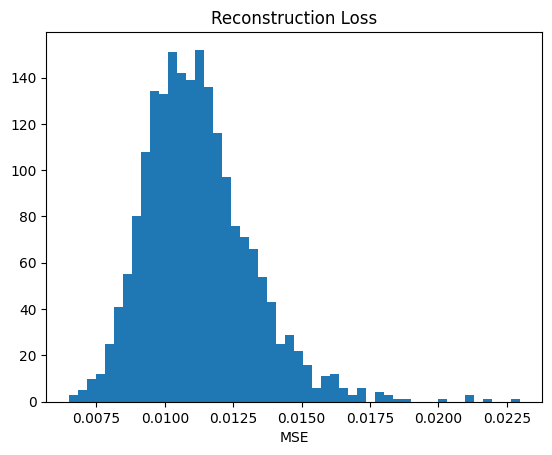

In [12]:
# Compute the mean squared error (reconstruction loss/error) for each sample

# unscale the predictions and true values
y_pred_unscaled = yscaler.inverse_transform(y_pred)
y_test_unscaled = yscaler.inverse_transform(y_test)

# compute the mean squared error for each sample
mse = np.mean((y_pred_unscaled - y_test_unscaled)**2, axis=1)

# plot the mean squared error for each sample
plt.hist(mse, bins=50)
plt.title("Reconstruction Loss")
plt.xlabel("MSE")

plt.show()